In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#请务必使用一同附上的数据，不然显示不出来
path = ''
data = pd.read_excel(path)
data.head()

execution                           offender_information_url  \
0        570  https://www.tdcj.texas.gov/death_row/dr_info/w...   
1        569  https://www.tdcj.texas.gov/death_row/dr_info/o...   
2        568  https://www.tdcj.texas.gov/death_row/dr_info/g...   
3        567  https://www.tdcj.texas.gov/death_row/dr_info/r...   
4        566  https://www.tdcj.texas.gov/death_row/dr_info/h...   

                                  last_statement_url last_name first_name  \
0  https://www.tdcj.texas.gov/death_row/dr_info/w...   Wardlow      Billy   
1  https://www.tdcj.texas.gov/death_row/dr_info/o...     Ochoa       Abel   
2  https://www.tdcj.texas.gov/death_row/dr_info/g...   Gardner       John   
3  https://www.tdcj.texas.gov/death_row/dr_info/r...   Runnels     Travis   
4  https://www.tdcj.texas.gov/death_row/dr_info/h...      Hall     Justen   

   TDCJ_Number  age        date      race   county prior occupation  \
0       999137   45    7/8/2020     White    Titus          laborer   
1       999450   47    2/6/2020  Hispanic   Dallas            multi   
2       999516   64   1/15/2020     White   Collin          painter   
3       999505   46  12/11/2019     Black   Potter          laborer   
4       999497   38   11/6/2019     White  El Paso          laborer   

   prior prison record eudcation level  \
0                    0              11   
1                    0              12   
2                    1              12   
3                    1              11   
4                    1               9   

                                      last statement  
0                                No statement given.  
1  Yes sir. I  would like to thank God, my dad, m...  
2  Thank you thank you  where’s the family, ok I ...  
3                                               None  
4  Yeah, I want to  address the Roundtree family ...

In [37]:
data.isnull().any(axis=0)

execution                   False
offender_information_url    False
last_statement_url          False
last_name                   False
first_name                  False
TDCJ_Number                 False
age                         False
date                        False
race                        False
county                      False
prior occupation            False
prior prison record         False
eudcation level             False
last statement              False
dtype: bool

In [38]:
data['prior occupation'].nunique()

100

In [39]:
data['eudcation level'].unique()

array([11, 12, 9, 8, 10, 14, 6, 'unknown', 16, 4, 7, 3, 5, 13, 15, 0],
      dtype=object)

In [40]:
data['race'].unique()

array(['White', 'Hispanic', 'Black', 'Other'], dtype=object)

-----------------
## 描述性分析

### 1.1年龄的描述性分析

In [41]:
data['age'].describe()
##可以看出犯人的年龄最小为24岁，最大为70岁，均值为接近40岁

count    570.000000
mean      39.801754
std        8.867170
min       24.000000
25%       33.000000
50%       38.500000
75%       45.000000
max       70.000000
Name: age, dtype: float64

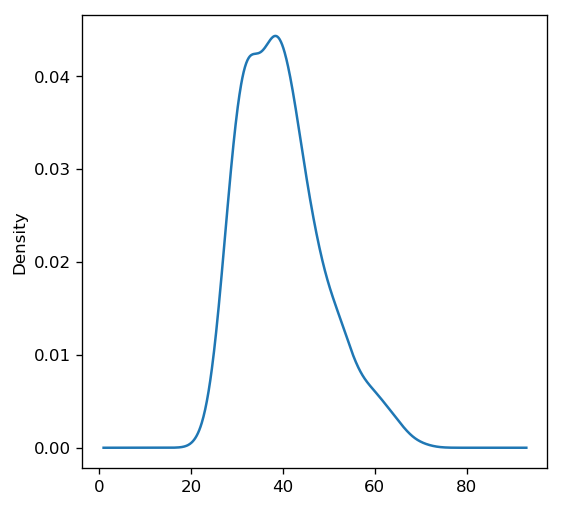

In [42]:
plt.figure(figsize=(5,5),dpi=120) 
data['age'].plot(kind='kde')
##用图表进行描述

- 下面对犯人的年龄进行分类
    - 20-30:group1
    - 31-40:group2
    - 41-50:group3
    - 51-60:group4
    - 61-70:group5

In [43]:
age = data['age']
group1=0
group2=0
group3=0
group4=0
group5=0
for x in age:
    if 20<=x<=30:
        group1+=1
    elif x<=40:
        group2+=1
    elif x<=50:
        group3+=1
    elif x<=60:
        group4+=1
    else:
        group5+=1

In [44]:
x = ['21-30','31-40','41-50','51-60','61-70']
y = [group1,group2,group3,group4,group5]

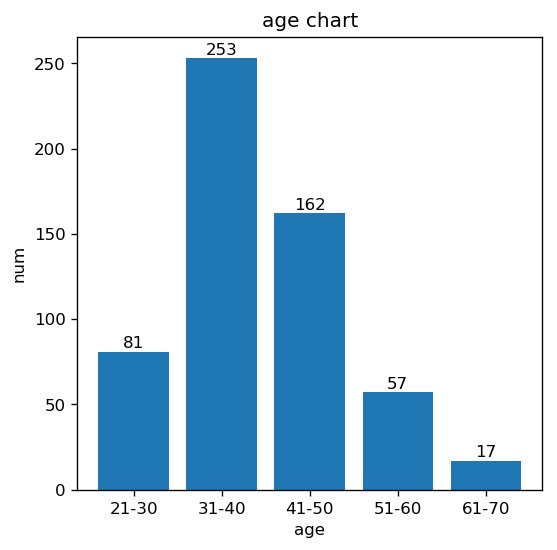

In [45]:
plt.figure(figsize=(5,5),dpi=120) 
plt.bar(x=x,height=y)
plt.xlabel('age') #设置X轴Y轴名称 
plt.ylabel("num") 
plt.title("age chart")
for x,y in zip(x,y):
    plt.text(x,y+5,y,horizontalalignment='center',verticalalignment='center')

#### 小结：

### 1.2种族的描述性分析

In [46]:
race = data['race']

In [47]:
race = race.value_counts()

(-1.11800924975739,
 1.1008575835751864,
 -1.1194799115426373,
 1.1276534519735657)

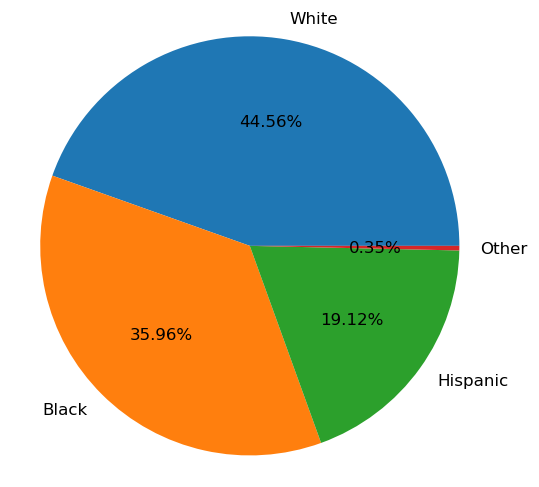

In [48]:
plt.figure(figsize=(5,5),dpi=120) 
plt.pie(race.values,labels=race.index,autopct = '%3.2f%%')
plt.axis('equal')
#可以看到执行死刑的犯人中，白人居多，其次为非裔美国人和拉美裔

- 结合2003年的得克萨斯洲的人口普查，进行分析
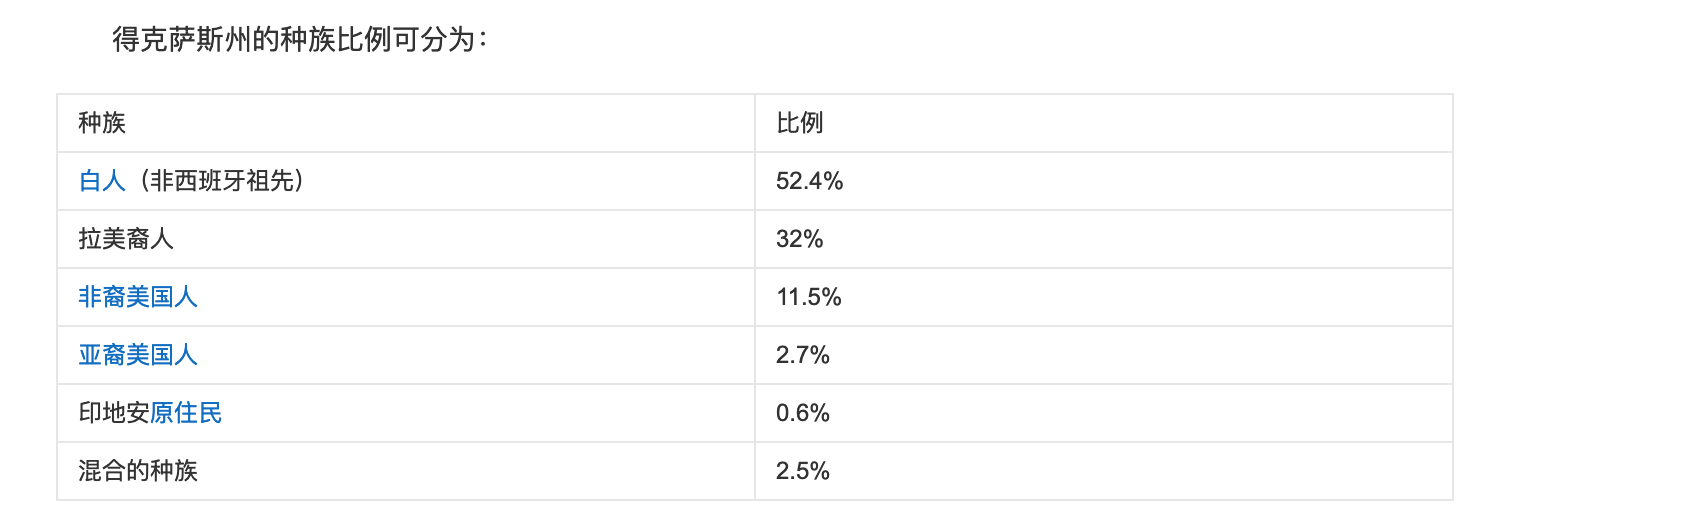

#### 小结：

### 1.3 地区的描述性分析

In [49]:
pass

### 1.4 职业的描述性分析

In [50]:
occ = data['prior occupation']

In [51]:
#有100个不同的职业
occ.nunique()

100

In [52]:
#可以大致看到排名前十的职业
occ.value_counts().head(10)
#multi:从事过多个职业，并且从事过的职业差别较大的

laborer                161
multi                   94
unknown                 50
construction worker     20
mechanic                19
electrician             16
carpenter               11
cook                    10
welder                  10
truck driver             9
Name: prior occupation, dtype: int64

#### 小结：

### 1.5 是否有犯罪记录的描述性分析

- 有犯罪记录（前科），取值1
- 没有犯罪记录，取值0
- 不清楚，取值2(record unavailable this date)

In [53]:
rec = data['prior prison record']

In [54]:
rec.unique()

array([0, 1, 2])

In [55]:
rec = rec.value_counts()

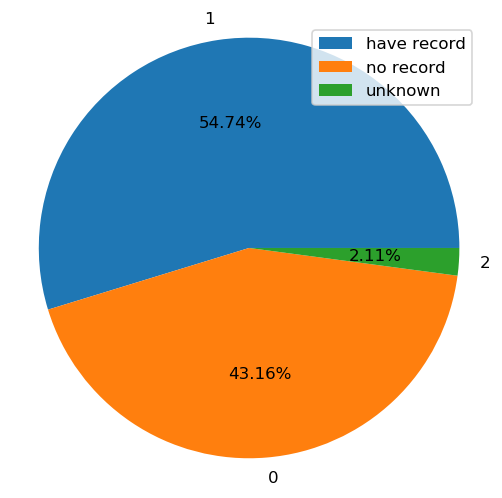

In [56]:
plt.figure(figsize=(5,5),dpi=120) 
plt.pie(rec.values,labels=rec.index,autopct = '%3.2f%%')
plt.legend(['have record','no record','unknown'],loc=0)
plt.axis('equal')
plt.show()

#### 小结：

### 1.6 教育的描述性分析

In [57]:
edu = data['eudcation level']

In [58]:
edu.value_counts()
#可以看出接受不同教育水平的人数

12         112
11          96
10          89
9           86
8           59
unknown     47
7           28
14          17
6           10
13           8
16           5
15           5
5            4
3            2
4            1
0            1
Name: eudcation level, dtype: int64

In [59]:
##为了进一步进行描述性分析将'unknown'的数据drop掉
def f_uk(x):
    if x == 'unknown':
        x = np.nan
    return x
edu = edu.apply(f_uk)

In [60]:
edu.describe()
#可以看出平均教育水平为10年

count    523.000000
mean      10.170172
std        2.074224
min        0.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       16.000000
Name: eudcation level, dtype: float64

In [61]:
edu_1 = edu.dropna()

In [62]:
edu_1 = edu_1.value_counts()

In [63]:
edu_1 = edu_1.sort_index()

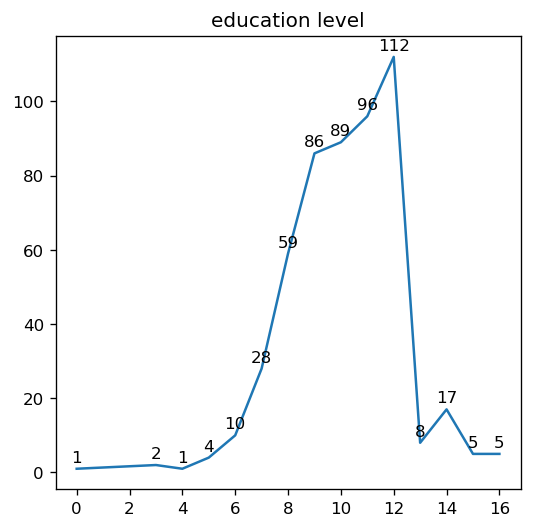

In [64]:
plt.figure(figsize=(5,5),dpi=120) 
edu_1.plot(title='education level')
for x,y in zip(edu_1.index,edu_1.values):
    plt.text(x,y+3,y,horizontalalignment='center',verticalalignment='center')

#### 小结：